In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

In [24]:
x

array([[-0.27034332, -1.98649369],
       [ 0.14977004, -0.19282447],
       [-2.00103794, -1.78125805],
       ...,
       [ 1.27208134,  1.62141945],
       [ 0.15231606, -1.1801614 ],
       [-1.2242408 , -1.86421098]])

In [25]:
y

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,

In [26]:
pd.DataFrame(x)[0]

0     -0.270343
1      0.149770
2     -2.001038
3     -0.738383
4      1.354325
         ...   
995   -0.112583
996   -2.341024
997    1.272081
998    0.152316
999   -1.224241
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

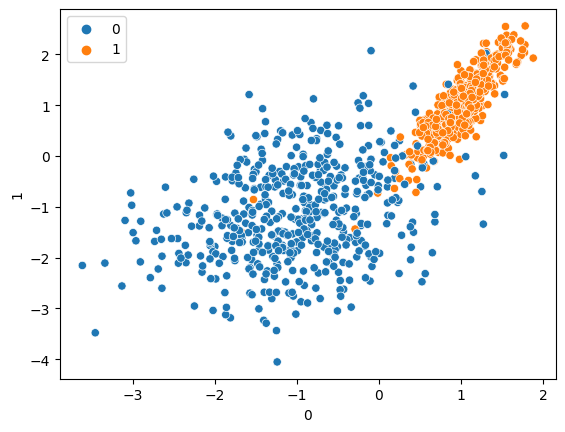

In [29]:
sns.scatterplot(x = pd.DataFrame(x)[0],y = pd.DataFrame(x)[1], hue=y)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=10)

In [38]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

In [39]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [40]:
y_pred = svc.predict(x_test)

In [49]:
svc.coef_

array([[1.94624293, 0.8491265 ]])

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       101
           1       0.98      0.93      0.95        99

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200

[[99  2]
 [ 7 92]]


In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.01,0.1,1,10,100,1000],
              'kernel':['linear', 'poly', 'rbf'],
              'gamma':[1,0.1,0.01,0.001,0.0001]}

In [46]:
grid = GridSearchCV(SVC(),param_grid,cv = 5,verbose=3,refit=True)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.988 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.944 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.969 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.956 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.944 total time=   0.0s
[CV 1/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.981 total time=   0.0s
[CV 2/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.944 total time=   0.0s
[CV 3/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.944 total time=   0.0s
[CV 4/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.956 total time=   0.0s
[CV 5/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.944 total time=   0.0s
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.988 total time=   0.0s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

In [47]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [48]:
y_pred1 = grid.predict(x_test)
print(classification_report(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       102
           1       0.98      0.94      0.96        98

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

[[100   2]
 [  6  92]]
